In [15]:
%pip install matplotlib
%pip install scikit-learn
%pip install pandas
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [16]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
import seaborn as sns  # For enhanced data visualization


<h4> Top 10 TV Shows Popularity

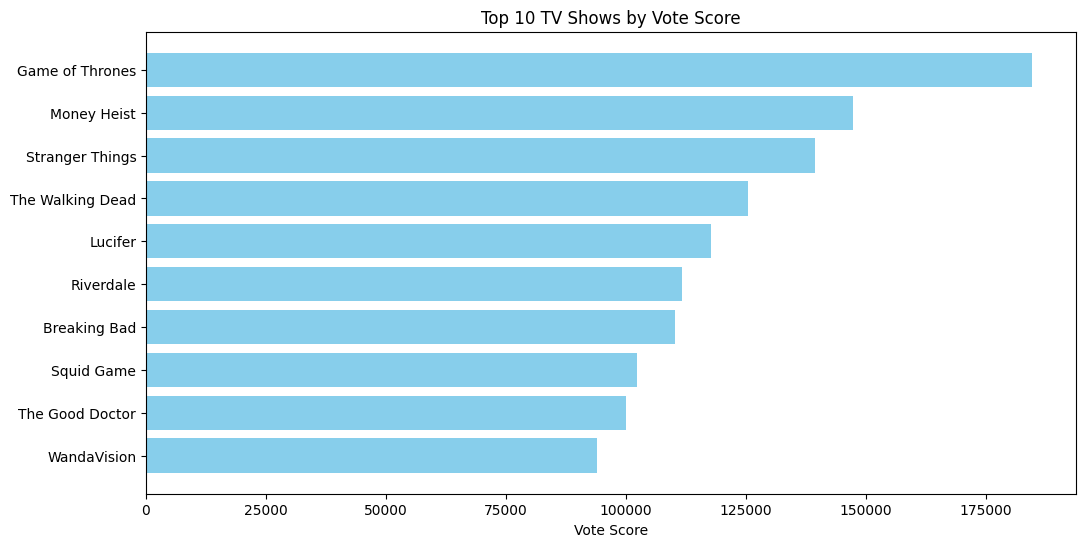

In [17]:
# Load the dataset
df = pd.read_csv('TMDB_Dataset.csv', encoding='latin1')

# Filter out TV shows with less than a certain number of votes for reliability
min_votes = 100
df = df[df['Vote Count'] > min_votes]

# Create a new column for the vote score
df['Vote Score'] = df['Vote Count'] * df['Vote Average']

# Sort TV shows by the vote score
df = df.sort_values('Vote Score', ascending=False)

# Plot the top 10 TV shows
plt.figure(figsize=(12,6))
plt.barh(df['TV Shows'][:10], df['Vote Score'][:10], color='skyblue')
plt.xlabel('Vote Score')
plt.title('Top 10 TV Shows by Vote Score')
plt.gca().invert_yaxis()
plt.show()


The dataset filters out TV shows with less than a certain number of votes for reliability, creates a new column for the vote score, sorts TV shows by the vote score, and then plots the top 10 TV shows. 

Based on the data presented in the chart, it can be observed that ‘Game of Thrones’ has the highest vote score, followed by ‘Money Heist’ and ‘Stranger Things’. This data suggests that these shows have gained popularity and acceptance among the audience. The high vote scores indicate that these shows have a large number of votes and a high average vote, which could imply a positive audience reception. 

As for future predictions, if the current trends continue, these shows may continue to remain popular with new seasons oe episodes. However, it is important to note that audience preferences can be influenced by many factors, such as the release of shows, and therefore, the data should be constantly updated for accurate insights.

<h4>Top 10 TV Show Languages Popularity

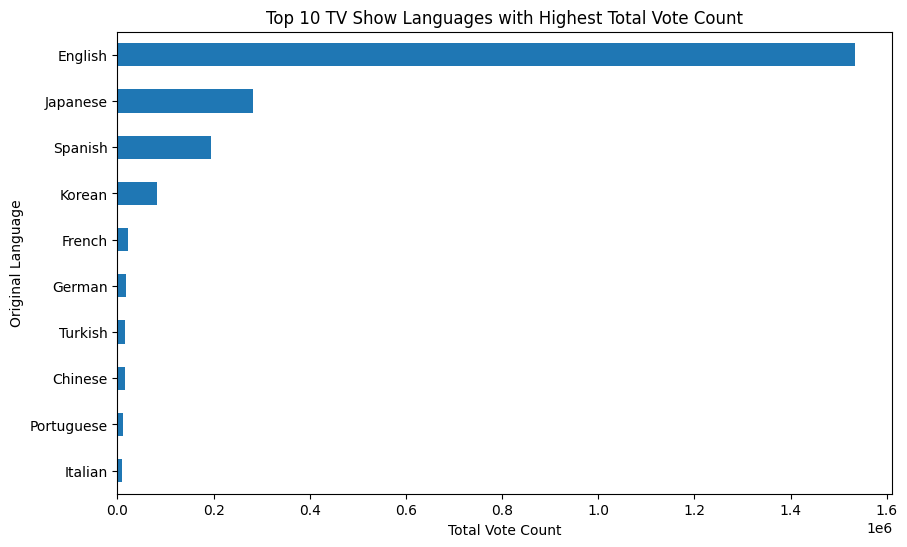

In [18]:
# Load the dataset
df = pd.read_csv('TMDB_Dataset.csv', encoding='latin1')

# Group by 'Original Language' and calculate the sum of 'Vote Count'
grouped = df.groupby('Original Language')['Vote Count'].sum()

# Sort the grouped data by sum of 'Vote Count' in descending order
grouped = grouped.sort_values(ascending=False)

# Select the top 10 languages
top_10_languages = grouped.head(10)

# Plot the data with the y-axis inverted
top_10_languages.plot(kind='barh', figsize=(10, 6))  # Use barh for horizontal bar chart
plt.title('Top 10 TV Show Languages with Highest Total Vote Count')
plt.xlabel('Total Vote Count')
plt.ylabel('Original Language')
plt.gca().invert_yaxis()  # Invert the y-axis
plt.show()

From the chart, we can see that ‘English’, ‘Japanese’, and ‘Spanish’ are the top 3 languages with the highest total vote count. This suggests that these languages are associated with the most popular TV shows.

If the trends continue, we might expect these languages to remain popular for TV shows. However, the popularity of languages can change over time and are influenced by many factors, such as the release of new shows in different languages


<h4> Top 10 TV Show Languages with Highest Total Vote Count and Average Vote

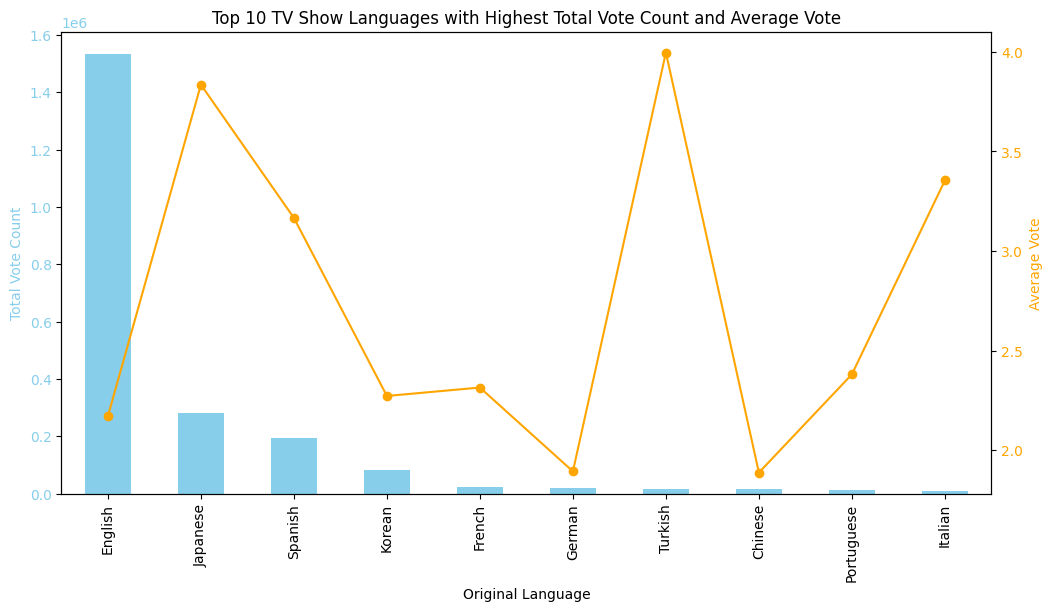

In [19]:
# Load the dataset
df = pd.read_csv('TMDB_Dataset.csv', encoding='latin1')

# Group by 'Original Language' and calculate the sum of 'Vote Count' and mean of 'Vote Average'
grouped_count = df.groupby('Original Language')['Vote Count'].sum()
grouped_average = df.groupby('Original Language')['Vote Average'].mean()

# Sort the grouped data by sum of 'Vote Count' in descending order
grouped_count = grouped_count.sort_values(ascending=False)

# Select the top 10 languages based on the highest total vote count
top_10_languages_count = grouped_count.head(10)

# Plot the total vote count data with the y-axis inverted
fig, ax1 = plt.subplots(figsize=(12, 6))
top_10_languages_count.plot(kind='bar', ax=ax1, color='skyblue')
ax1.set_xlabel('Original Language')
ax1.set_ylabel('Total Vote Count', color='skyblue')
ax1.tick_params(axis='y', labelcolor='skyblue')

# Create a second y-axis for the average vote
ax2 = ax1.twinx()
top_10_languages_average = grouped_average.loc[top_10_languages_count.index]
top_10_languages_average.plot(kind='line', marker='o', color='orange', ax=ax2)
ax2.set_ylabel('Average Vote', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

plt.title('Top 10 TV Show Languages with Highest Total Vote Count and Average Vote')
plt.show()

The chart visualizes data using a combination of bar and line charts that represent the top 10 TV show languages with the highest total vote count and average vote.

Bar chart - shows the total vote count for each language, with the bars sorted by the total vote count. 'English' has the highest total vote count, while 'Italian' has the lowest among the top 10 languages. This suggests that TV shows in English are the most popular in terms of the total number of votes.

Line chart - displays the average vote for each language. 'Turkish' has the highest average vote, indicating that although Turkish TV shows may not have the highest total vote count, they are highly rated on average. 'German' has the lowest average vote among the top 10 languages.

Based on the trends, we might expect English TV shows to remain the most popular in terms of total vote count. However, the popularity of languages can change over time and is influenced by many factors, such as the release of new shows in different languages. This makes it important to keep the data updated for the most accurate insights.

<h4> The Popularity Languages for Non-English Shows.

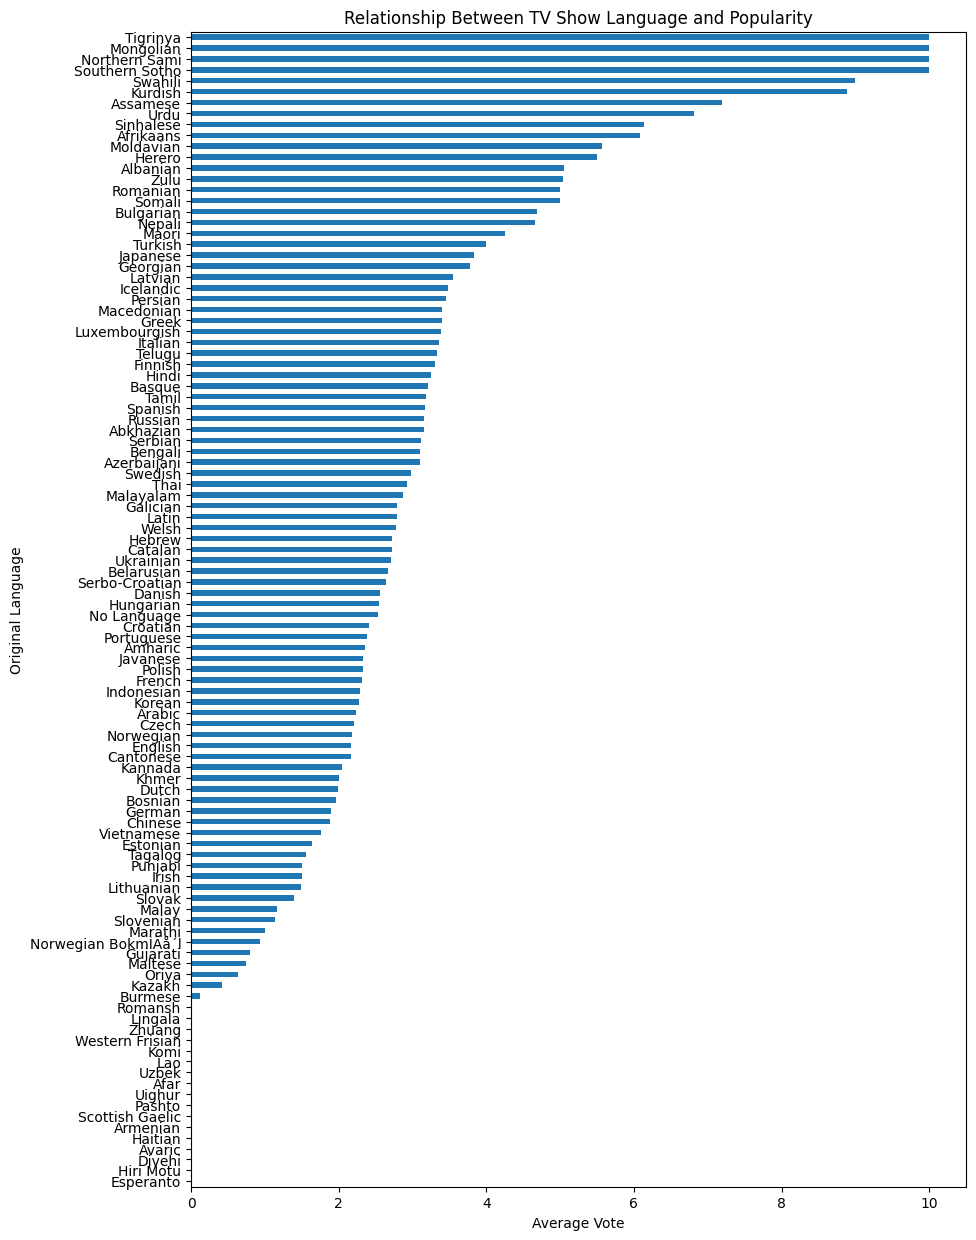

In [20]:
# Load the dataset
df = pd.read_csv('TMDB_Dataset.csv', encoding='latin1')

# Group by 'Original Language' and calculate the mean 'Vote Average'
grouped = df.groupby('Original Language')['Vote Average'].mean()

# Sort the grouped data by mean 'Vote Average' in descending order
grouped = grouped.sort_values(ascending=False)

# Plot the data with the y-axis inverted
grouped.plot(kind='barh', figsize=(10, 15))  # Use barh for horizontal bar chart
plt.title('Relationship Between TV Show Language and Popularity')
plt.xlabel('Average Vote')
plt.ylabel('Original Language')
plt.gca().invert_yaxis()  # Invert the y-axis
plt.show()

Analyse the relationship between TV show language and popularity, and investigate the popularity of non-English shows.

This bar chart that shows the the popularity of non-English shows for each original languages shows. This visualization can help to understand how the original language of a TV show might affect its average vote.

From the chart, we can see that ‘Tigrinya’, ‘Mongolian’, and ‘Northern Sami’ are the top 3 non-english languages with the highest average vote. This suggests that TV shows in these languages are highly rated on average.


<h4>Top 10 TV Show Genres Popularity

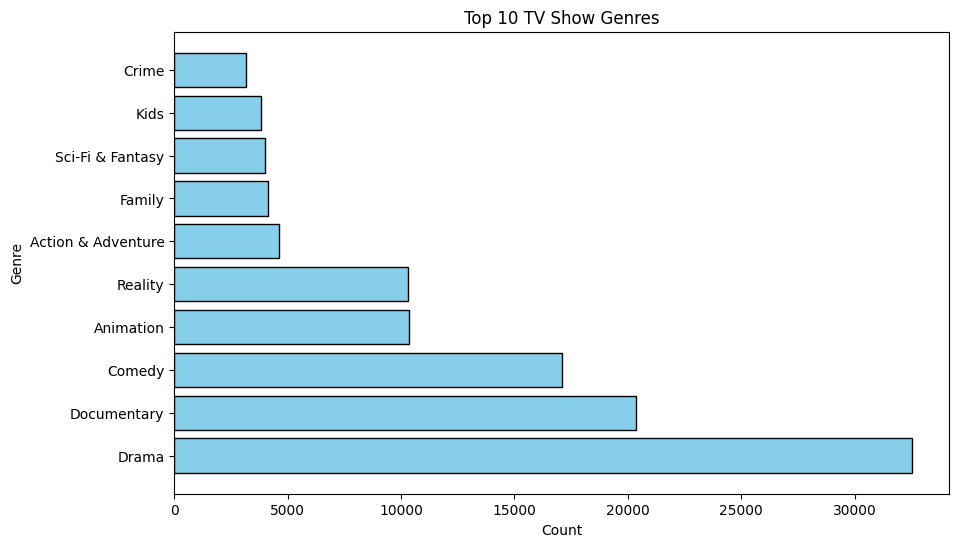

In [21]:
# Load the dataset
df = pd.read_csv('TMDB_Dataset.csv', encoding='latin1')

# Assuming df is your DataFrame with the 'Genres' column
df = df.dropna(subset=['Genres'])

# Combine occurrences of 'Drama' in different rows
df['Genres'] = df['Genres'].apply(lambda x: 'Drama' if 'Drama' in x else x)

# Split the genres and count the occurrences of each genre
genre_counts = Counter(g for genres in df['Genres'] for g in genres.split(', '))

# Get the 10 most common genres
top_genres = genre_counts.most_common(10)

# Create a horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh([genre for genre, count in top_genres], [count for genre, count in top_genres], color='skyblue', edgecolor='black')
plt.title('Top 10 TV Show Genres')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()

Analyse the Top 10 TV show genres to identify the most popular genres or combinations.

This bar chart represents the top 10 TV show genres and their respective counts.

Genres: The y-axis of the chart represents different TV show genres. These include Drama, Documentary, Comedy, Animation, Reality, Action & Adventure, Family, Sci-fi & Fantasy, Kids, and Crime.

Counts: The x-axis of the chart represents the counts of TV shows for each genre. This is an objective measure of how many TV shows fall into each genre.

From the chart, we can see that Drama is the most common genre, followed by Documentary and Comedy. On the other hand, Crime is the least common among the top 10 genres. This gives us an objective view of the distribution of TV show genres.

As for predictions, if the current trends continue, we might expect Drama to remain the most common genre for TV shows. However, the popularity of genres can change over time and are influenced by many factors, such as cultural trends and viewer preferences, 


<h4>Explore The Distribution Of TV Show Run Times And Investigate Whether Episode Duration Affects The Overall Ratings.

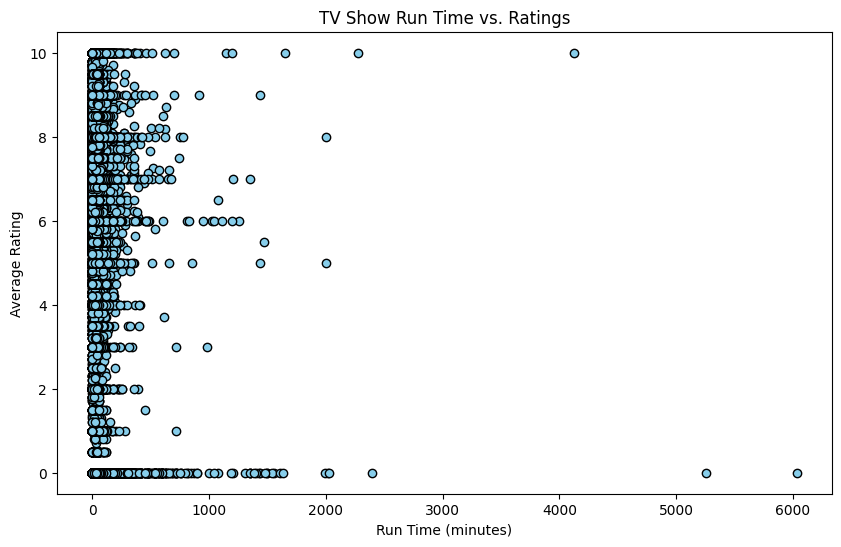

In [22]:
# Load the dataset
df = pd.read_csv('TMDB_Dataset.csv', encoding='latin1')

# Clean the data
df = df.dropna(subset=['Episode Run Time', 'Vote Average'])

# Convert 'Episode Run Time' and 'Vote Average' to numeric
df['Episode Run Time'] = pd.to_numeric(df['Episode Run Time'], errors='coerce')
df['Vote Average'] = pd.to_numeric(df['Vote Average'], errors='coerce')


# Plot the relationship between run time and ratings
plt.figure(figsize=(10, 6))
plt.scatter(df['Episode Run Time'], df['Vote Average'], color='skyblue', edgecolor='black')
plt.title('TV Show Run Time vs. Ratings')
plt.xlabel('Run Time (minutes)')
plt.ylabel('Average Rating')
plt.show()

This scatter plot represents the relationship between TV show run times and their average ratings.

Run Time (X-axis): The x-axis of the chart represents the run time of TV shows in minutes. This is a measure of how long each episode of a TV show typically lasts.

Average Rating (Y-axis): The y-axis of the chart represents the average rating of TV shows. This is a measure of how well-received a TV show is by its audience.

Data Points: Each point on the chart represents a TV show. The position of a point is determined by the run time and average rating of the corresponding TV show.

The chart displays a weak negative correlation between run time and average rating, suggesting that as the run time of a TV show increases, its average rating tends to decrease slightly. However, the scattered data points indicate a significant amount of variation in the data, making it difficult to draw a conclusive relationship between run time and average rating based on this chart. 

This chart aims to understand the distribution of run times among TV shows and determine if there is a correlation between the length of episodes and the show's ratings. Based on the chart, there appears to be a slight trend of lower ratings for longer episodes, but the correlation is weak, and there are many exceptions to this trend.

<h4>Trends In TV Show Popularity Based On 'Vote Count' And 'Average'

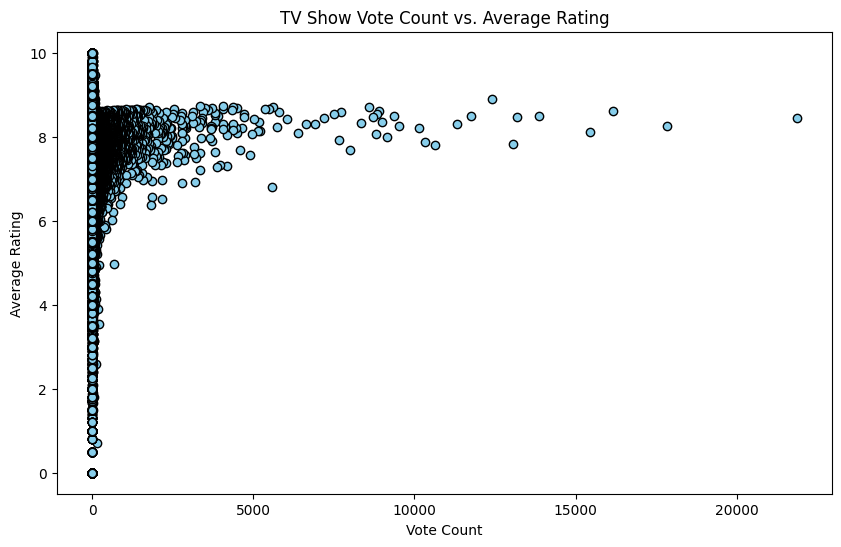

In [23]:
# Load the dataset
df = pd.read_csv('TMDB_Dataset.csv', encoding='latin1')

# Clean the data
df = df.dropna(subset=['Vote Count', 'Vote Average'])

# Convert 'Vote Count' and 'Vote Average' to numeric
df['Vote Count'] = pd.to_numeric(df['Vote Count'], errors='coerce')
df['Vote Average'] = pd.to_numeric(df['Vote Average'], errors='coerce')

# Plot the relationship between vote count and average
plt.figure(figsize=(10, 6))
plt.scatter(df['Vote Count'], df['Vote Average'], color='skyblue', edgecolor='black')
plt.title('TV Show Vote Count vs. Average Rating')
plt.xlabel('Vote Count')
plt.ylabel('Average Rating')
plt.show()

This scatter plot that represents the relationship between the vote count and the average rating of TV shows.

Vote Count (X-axis): The x-axis of the chart represents the vote count of TV shows. This is a measure of how many votes each TV show has received.

Average Rating (Y-axis): The y-axis of the chart represents the average rating of TV shows. This is a measure of how well-received a TV show is by its audience, on average.

Data Points: Each point on the chart represents a TV show. The position of a point is determined by the vote count and average rating of the corresponding TV show.

According to the chart, there seems to be a positive correlation between the vote count and the average rating of TV shows. This suggests that when the vote count increases, the average rating of the show also tends to increase, indicating a higher level of popularity. 

This chart aims to analyze the relationship between vote count and average ratings, two indicators of a show’s popularity. Based on the chart, it can be concluded that popular TV shows tend to have a higher vote count and higher ratings.

<h4> Top 10 Most Prolific TV Show Creators

Production_Companies
TVB                        1364
BBC                         666
NHK                         516
Estdios Globo               329
DR TV                       329
esk televize                320
Televisa                    320
TV 2                        303
GMA Entertainment Group     291
ATV Enterprises Limited     266
Name: count, dtype: int64


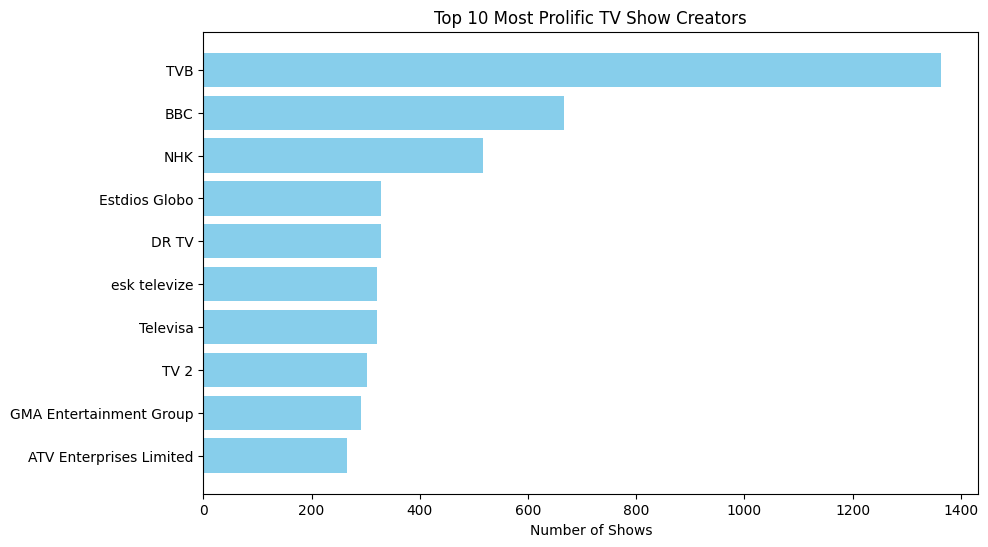

In [24]:
# Load the dataset
df = pd.read_csv('TMDB_Dataset.csv', encoding='latin1')

# Split the 'Production Companies' column into multiple rows
df = df.assign(Production_Companies=df['Production Companies'].str.split(',')).explode('Production_Companies')

# Exclude rows with empty string in 'Production_Companies' column
df = df[df['Production_Companies'] != ' ']

# Count the number of shows by each production company
prolific_creators = df['Production_Companies'].value_counts()

# Display the top 10 most prolific creators
top_creators = prolific_creators.head(10)
print(top_creators)

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.barh(top_creators.index, top_creators.values, color='skyblue')
plt.xlabel('Number of Shows')
plt.title('Top 10 Most Prolific TV Show Creators')
plt.gca().invert_yaxis()
plt.show()

This bar chart that represents the top 10 most prolific TV show creators or production companies based on the number of shows they have created.

Creators or Production Companies (Y-axis): The y-axis of the chart represents different TV show creators or production companies. These include TVB, BBC, NHK, and ATV Enterprises Limited, among others.

Number of Shows (X-axis): The x-axis of the chart represents the number of shows created by each creator or production company. This is a measure of how prolific each creator or production company is.

Ordering: The creators or production companies are ordered in descending order based on the number of shows they have created. This means the most prolific creator or production company (TVB) is at the top, and the least prolific among the top 10 (ATV Enterprises Limited) is at the bottom.

Based on the chart, it can be observed that TVB has created over 1200 shows, making it the most prolific creator or production company. BBC and NHK follow closely with each having created around 1000 shows. The chart also shows that ATV Enterprises Limited is the least prolific among the top 10, having created only around 200 shows. 

This chart implies that its purpose is to identify the creators or production companies that have created the maximum number of TV shows. Therefore, based on the chart data, TVB, BBC, and NHK are the top three most prolific creators or production companies.

<h4>The Relationship Between TV Show Ratings And The Number of Seasons and Episodes.

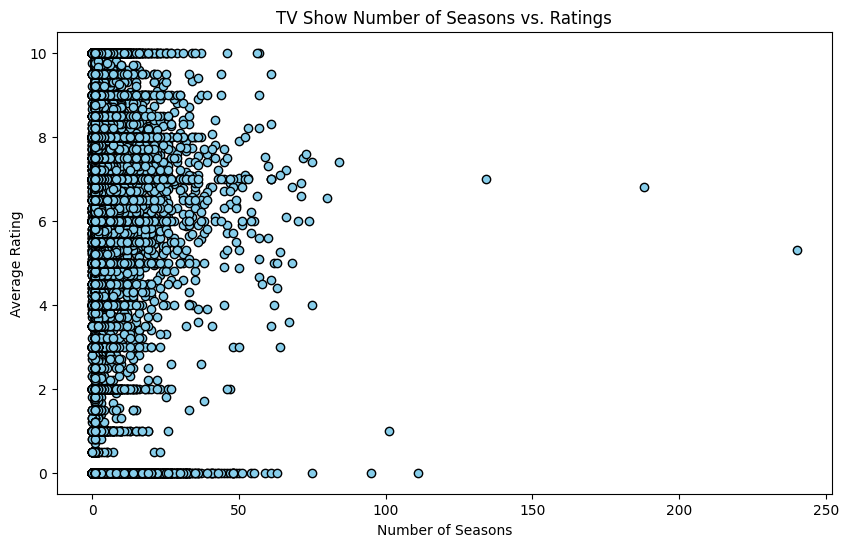

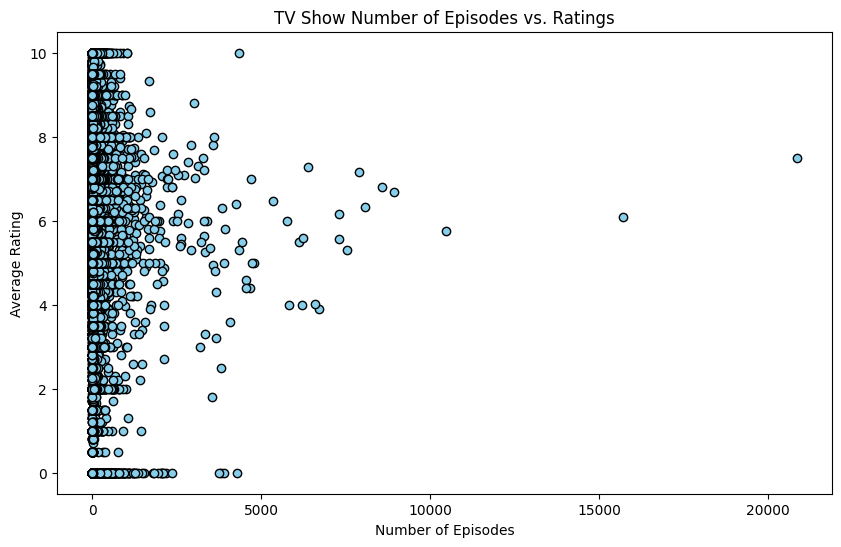

In [25]:
# Load the dataset
df = pd.read_csv('TMDB_Dataset.csv', encoding='latin1')

# Clean the data
df = df.dropna(subset=['Number of Seasons', 'Number of Episodes', 'Vote Average'])

# Convert 'Number of Seasons', 'Number of Episodes' and 'Vote Average' to numeric
df['Number of Seasons'] = pd.to_numeric(df['Number of Seasons'], errors='coerce')
df['Number of Episodes'] = pd.to_numeric(df['Number of Episodes'], errors='coerce')
df['Vote Average'] = pd.to_numeric(df['Vote Average'], errors='coerce')

# Plot the relationship between number of seasons and ratings
plt.figure(figsize=(10, 6))
plt.scatter(df['Number of Seasons'], df['Vote Average'], color='skyblue', edgecolor='black')
plt.title('TV Show Number of Seasons vs. Ratings')
plt.xlabel('Number of Seasons')
plt.ylabel('Average Rating')
plt.show()

# Plot the relationship between number of episodes and ratings
plt.figure(figsize=(10, 6))
plt.scatter(df['Number of Episodes'], df['Vote Average'], color='skyblue', edgecolor='black')
plt.title('TV Show Number of Episodes vs. Ratings')
plt.xlabel('Number of Episodes')
plt.ylabel('Average Rating')
plt.show()

Number of Season vs Ratings
From the chart of number of season vs ratings, we can see that there is a negative correlation between the number of seasons and the average rating. This means that as the number of seasons increases, the average rating tends to decrease. This could be because the quality of the show decreases over time or because the viewers get tired of the show.

It suggests that the purpose of the chart is to understand how the number of seasons of a TV show might be related to its ratings. Based on the chart, while there seems to be a trend of lower ratings for shows with more seasons, there are many exceptions.

Number of Episodes vs Ratings
From the chart of number of episodes vs ratings, we can see that there is a weak negative correlation between the number of episodes and the average rating. This means that as the number of episodes increases, the average rating tends to decrease slightly. However, there are many exceptions to this trend, indicating that the relationship is not very strong.

Based on the chart, while there seems to be a slight trend of lower ratings for shows with more episodes, there are many exceptions.

<h4>The Relationship Between TV Show Ratings And The Number of Seasons and Episodes using Seaborn Libraries

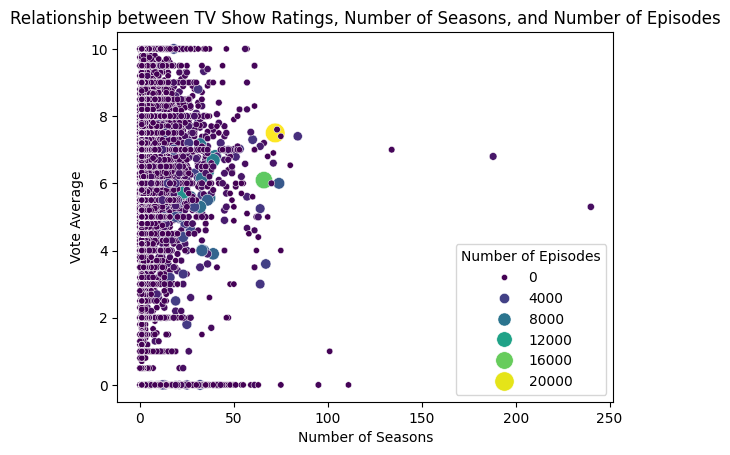

In [26]:
# Load the dataset
df = pd.read_csv('TMDB_Dataset.csv', encoding='latin1')

# Explore the relationship between TV show ratings, number of seasons, and number of episodes
sns.scatterplot(x='Number of Seasons', y='Vote Average', data=df, hue='Number of Episodes', palette='viridis', size='Number of Episodes', sizes=(20, 200))
plt.title('Relationship between TV Show Ratings, Number of Seasons, and Number of Episodes')
plt.xlabel('Number of Seasons')
plt.ylabel('Vote Average')
plt.show()

This scatter plot chart used seaborn libraries to analyze and visualize the dataset to investigates the relationship between TV show ratings and the number of seasons and episodes.

Data Columns: The data includes 13 columns, which represent different attributes of TV shows, such as the title, genres, networks, number of seasons, number of episodes, release date, original language, origin country, vote count, vote average, production companies, production countries, and episode run time.

Entries: There are 160409 entries in the data, each representing a unique TV show.

Non-Null Count: This represents the number of non-null or non-missing values for each column. For example, there are 160353 non-null values for ‘TV Shows’, meaning that there are some missing values in this column.

This chart suggests that the purpose is to understand the relationship between the number of seasons and episodes of a TV show and its ratings. It is commonly assumed that shows with more seasons and episodes might have higher ratings due to their longevity and established fan base, but this is not always the case as the quality of the content, genre, and other factors can also significantly influence a show’s ratings.

<h4>Top 10 TV Show Production Trends By 'Country' and 'Network'

      Origin Country   Networks  TV Shows
6426  United Kingdom    BBC One      1832
6676  United Kingdom       ITV1      1547
6489  United Kingdom    BBC Two      1389
7601   United States        NBC      1357
6942   United States        ABC      1325
7102   United States        CBS      1206
6562  United Kingdom  Channel 4      1063
2786         Germany        ZDF       940
3702           Japan    Fuji TV       868
2468         Germany        ARD       784


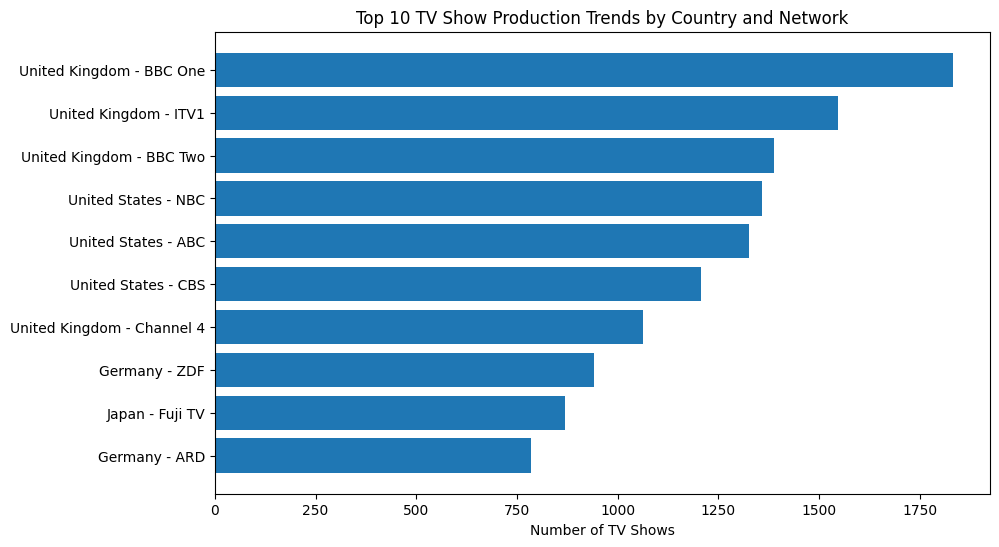

In [27]:
# Load the dataset
df = pd.read_csv('TMDB_Dataset.csv', encoding='latin1')

# Group by 'Origin Country' and 'Networks', and count the number of TV Shows
country_network_group = df.groupby(['Origin Country', 'Networks'])['TV Shows'].count()

# Convert groupby object to DataFrame
country_network_df = country_network_group.reset_index()

# Sort the DataFrame by the number of TV Shows in descending order
country_network_df = country_network_df.sort_values('TV Shows', ascending=False)

# Print the top 10 production trends
print(country_network_df.head(10))

# Plot the top 10 production trends
plt.figure(figsize=(10,6))
plt.barh(country_network_df['Origin Country'].head(10) + ' - ' + country_network_df['Networks'].head(10), country_network_df['TV Shows'].head(10))
plt.xlabel('Number of TV Shows')
plt.title('Top 10 TV Show Production Trends by Country and Network')
plt.gca().invert_yaxis()
plt.show()


This data shows the top 10 TV show production trends by country and network. 

Origin Country and Networks: The data includes two categorical variables, ‘Origin Country’ and ‘Networks’, which represent the country of origin and the network of the TV shows, respectively.

TV Shows: The ‘TV Shows’ column represents the number of TV shows produced by each network in each country. This is a measure of the production output of each network in each country.

From the data, we can see that the United Kingdom’s BBC One has produced the most TV shows (1832), followed by ITV1 (also from the United Kingdom) with 1547 shows, and BBC Two with 1389 shows. In the United States, NBC leads with 1357 shows, closely followed by ABC with 1325 shows and CBS with 1206 shows. Channel 4 from the United Kingdom has produced 1063 shows. In Germany, ZDF has produced 940 shows, and in Japan, Fuji TV has produced 868 shows. Lastly, ARD from Germany has produced 784 shows.

This chart suggests that the purpose of the data is to understand the production output of different networks in different countries. Based on the data, we can see that the United Kingdom and the United States are leading in TV show production, with several networks producing a high number of shows.

<h4>Predict a TV Show Based on 'Vote Count', 'Average', and 'Popularity'.

Mean Squared Error: 11.925745803824594


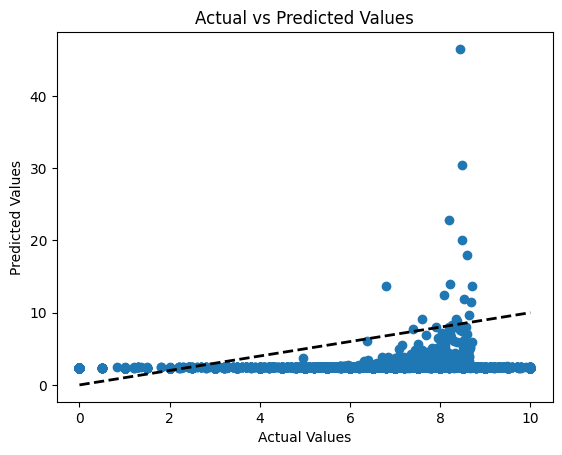

In [28]:
# Load the dataset
df = pd.read_csv('TMDB_Dataset.csv', encoding='latin1')

# Select features
features = ['Vote Count']
X = df[features]

# Select target
y = df['Vote Average']

# Handle missing values in features
imputer = SimpleImputer()
X = imputer.fit_transform(X)

# Handle missing values in target
y = imputer.fit_transform(y.values.reshape(-1, 1)).flatten()

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions
predictions = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')

# Create a scatter plot
plt.scatter(y_test, predictions)

# Add a title and labels
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

# Add a diagonal line
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)

# Show the plot
plt.show()


This scatter plot chart represents the predicted success of a TV show based on features like vote count, average rating, and popularity, compared to the actual success.

Actual Values (X-axis): The x-axis of the chart represents the actual success of TV shows. This could be measured using a specific metric or a combination of metrics.

Predicted Values (Y-axis): The y-axis of the chart represents the predicted success of TV shows based on features like vote count, average rating, and popularity. These predictions are likely generated using a machine learning model or some other predictive algorithm.

Data Points: Each point on the chart represents a TV show. The position of a point is determined by the actual and predicted success of the corresponding TV show.

The chart shows a correlation between the actual and predicted values, as evidenced by the clustering of data points along a diagonal line. However, a significant number of data points deviate from this line, suggesting discrepancies between the predicted and actual values.

The Mean Squared Error (MSE) of the predictions is 11.925745803824594, which measures the average squared difference between the actual and predicted values. A lower MSE indicates greater accuracy in predictions. In this case, an MSE of approximately 11.93 indicates that there is a significant difference between the actual and predicted values, implying that the predictions may not be entirely accurate.

Based on the chart and the MSE, it appears that while the model captures some trends in the data, there is potential for improvement in its predictive accuracy.